

> What is Residual Analysis ?
  - Residuals are the differences between the actual values (what we're trying to predict) and the predicted values from our model. In our case, its Acutual Price - predicted Price for each house.

> **Formula : Residual = y actuall - y predicted**

> Why : Residuals tell us how well our linear regression fits the data and whether its behaving as it should. If the model's perfect

> Key assumptions to check with residuals :
  - Linearity : the relationship between features(eg. MedInc) and target (Price) is a straight line.
  - Consatant Variance(Homoscedasticity) : Residuals have similar spread across all predicted values-not fanning out or clustering
  - Normality : Residuals are roughly bell-shaped(normal distribution)-no weird skew.
  - Independence : Residuals dont follow a pattern over time or order(less relevant here, no time data).



> **Step 1 : Load data and Train model**



In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error as root_mean_squared_error

In [2]:
# step 1 : load data
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target

In [3]:
# features and target
x=df.drop('Price',axis=1)
y=df['Price']

In [4]:
# split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# train linear regression
model = LinearRegression()
model.fit(x_train,y_train)
# predict
y_pred = model.predict(x_test)

In [10]:
# calculating accuracy

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error : {mse:.2f} $100K")
print(f"Mean Absolute Error : {mae:.2f} $100K")
print(f"Root Mean Squared Error : {rmse:.2f} $100K")
print(f"R-squared : {r2:.2f}")

Mean Squared Error : 0.56 $100K
Mean Absolute Error : 0.53 $100K
Root Mean Squared Error : 0.75 $100K
R-squared : 0.58




>

> **Step 2 : Calculate Residuals**





In [11]:
# residuals = actual - predicted
residuals = y_test - y_pred
# quick peek
print("\n First 5 residuals : ")
print(pd.DataFrame ({'Acutal' : y_test[:5], 'Predicted' : y_pred[:5], 'Residual' : residuals[:5]}))


 First 5 residuals : 
        Acutal  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343



- Positive Residual : Model underpredicted (eg : 0.560 = $56K too low)

- Negative Residual : Model overpredicted ( eg : -0.564 = $56K too high)





**Step 3 : Residual Plots**


> We'll make two key plots:
  - Plot 1 : Residuals vs Predicted values
  - Plot 2 : Histogram of Residuals



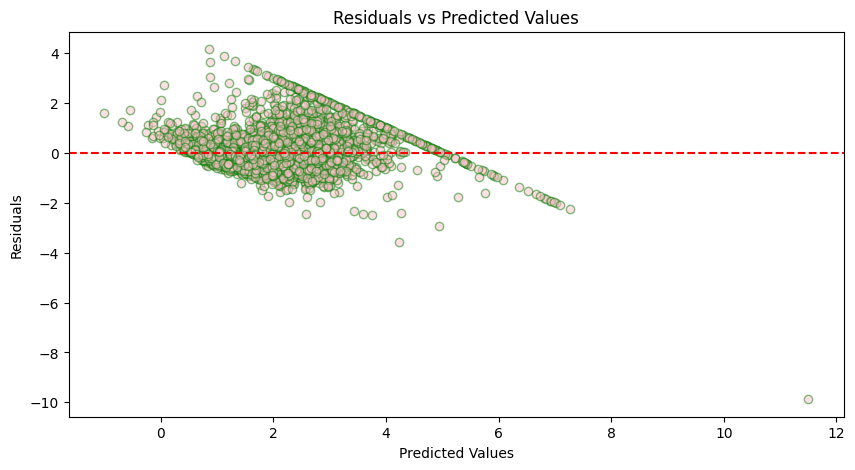

In [24]:
# plot 1
plt.figure(figsize=(10,5))
plt.scatter(y_pred,residuals,color='pink',edgecolors='green',alpha =0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

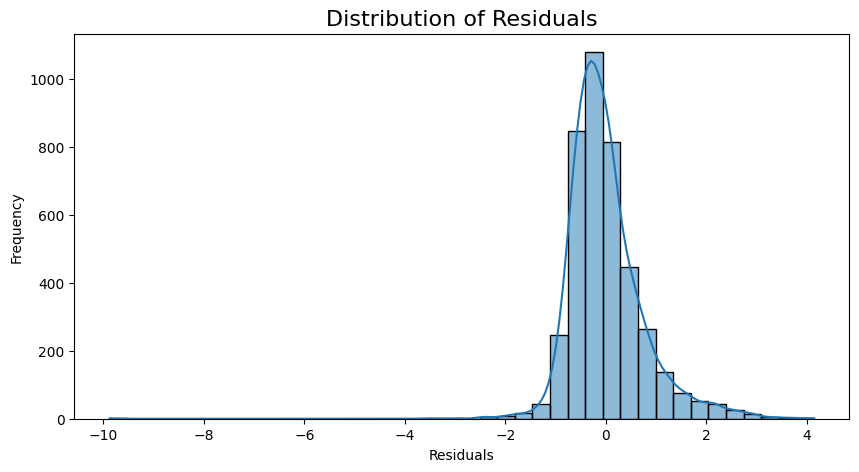

In [25]:
# plot 2
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins = 40, kde = True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals',fontsize= 16)
plt.show()



> Q-Q Plot (Normality Check)



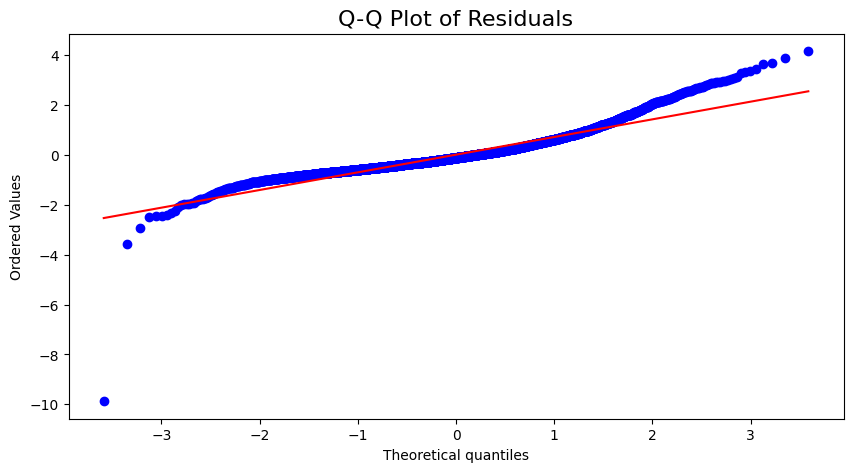

In [28]:
import scipy.stats as stats
plt.figure(figsize=(10,5))
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals',fontsize = 16)
plt.show()



> **What you look for :**
  - Good : Points follow the red line(normal)
  - Bad : Big deviations, especially at ends
  - Our case : Mostly linear, but tails curve off-non-normal extremes(capping effect)





> **Step 4 : Interpret Residual Analysis**
  - Linearity : Scatter plot shows no strong curve- assumption holds decently
  - Constant Variance : slight fanning at higher prices--mild heteroscedasicity (variance grows)
  - Normality : Histogram and Q-Q show approximate normality, but tails suggest outliers or capping($500K limit skews residuals)
  - Takeaway : Model's okay but not perfect--capping and non-constant variance could be issues





> **Step 5 : Metrics to support analysis**





> **Standardization Vs Normalization : both used to scale numerical data in ML.**
  - Standardization (Z-Score scaling):
    - definition : standardization transforms the data to have a mean(U) of 0 and standard deviation (sigma) of 1.
    - Formula : x (standardized) = X - U / sigma, where
      - X - orginal feature value
      - U - mean of the feature
      - sigma - standard deviation of the data
    - When to use? :
      - when data follows a Guassian (normal) distribution
      - Used in PCA, Logistic Rgeression,Linear Regression, SVM,K-Mean, etc.
      - Helps in models that assume normally distributed data
    - Effect on Data :
      - Keeps original distribution shape
      - Allows data to retain negative values
      - Helps algorithms like SVM and K-means.
  - Normalization (Min-Max Scaling):
    - definition : Normalization transforms data into a fixed range, typically [0,1] or [-1,1]
    - Formula (min - max scaling) : x (normalized) = X - Xmin / Xmax - Xmin, where
      - X : original feature value
      - Xmin : min value in the feature
      - Xmax : Max value in the feature
    - when to use ? :
      - when data has different scales and needs to be compared fairly
      - Usedin Neural Networks, KNN, Decision trees
      - Works well with bounded datasets
    - Effect on data :
      - Rescales values between 0 and 1
      - Good for features with different
  - Key differences (Standardization Vs Normalization) :
    - range : no fixed range, fixed range
    - effect ondata : centered at 0, with unit variance      rescales daat within a fixed range
    - best used when : data is normally distributed       data has different scales or outliers
    - examples of use cases : SVM,PCA,Linear Regression,K-means         Neural networks, KNN,Image processing
    - sensitive to outliers ? : No    Yes



> **Cross Validation : A tehcnique to improve model performance**
  - Cross validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets fom traing and testing. This helps in avoiding overfitting and ensures that the model generalizes well to unseen data.
  - Why use cross validation ?
    - Prevents overfitting (when a model performs wellon training data but poorly on new data)
    - ensures the model is evaluated on different subsets of the data
    - Provides a more reliable performance estimate than a single train-test split.
  - **K-Fold Cross Validation (most common) :**
    - How it works?
      - Split the dataset into K - equal sized folds
      - Train the  model on K-1 folds and test on the remaining field
      - Repeat the process K times, each time using a different fold as the test set.
      - Compute the average performance across all K iterations.
      - Example (K=5) :     
        1. Train on folds 2,3,4,5 -> Test on fold 1
        2. Train on folds 1,3,4,5 -> Test on fold 2
        3. Train on folds 1,2,4,5 -> Test on fold 3
        4. Train on folds 1,2,3,5 -> Test on fold 4
        5. Train on folds 1,2,3,4 -> Test on fold 5

In [32]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# generate synthetic data
x,y = make_regression(n_samples=100, n_features=2, noise=10)
# k- fold cross - validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
# perform cross - validation
scores = cross_val_score(model,x,y,scoring='r2',cv=kf)
print("Cross validation scores : ",scores)
print("Average score : ", scores.mean())


Cross validation scores :  [0.98140754 0.98650097 0.97479749 0.98588332 0.98046573]
Average score :  0.981811008766871
